In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
try:
    dfNet = pd.read_csv('netflix_titles.csv')
except:
    print("impossible aprire file")
    


In [ ]:
listafilm = dfNet.groupby('type').count().reset_index()
listafilm

,type,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131
1,TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676


In [ ]:
series = dfNet[dfNet['type'] == 'TV Show'].copy()
series['seasons'] = series['duration'].str.extract(r'(\d+)').astype(float)
mediaSerieTv = series['seasons'].mean()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2.0
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2.0
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3.0
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1.0


In [23]:
films = dfNet[dfNet['type'] == 'Movie'].copy()
films['minutes'] = films['duration'].str.extract(r'(\d+)').astype(float)
mediaFilm = films['minutes'].mean()


C:\Users\Vik10\AppData\Local\Temp\ipykernel_18080\3878819162.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mediaDati.keys()), y=list(mediaDati.values()), palette="viridis")


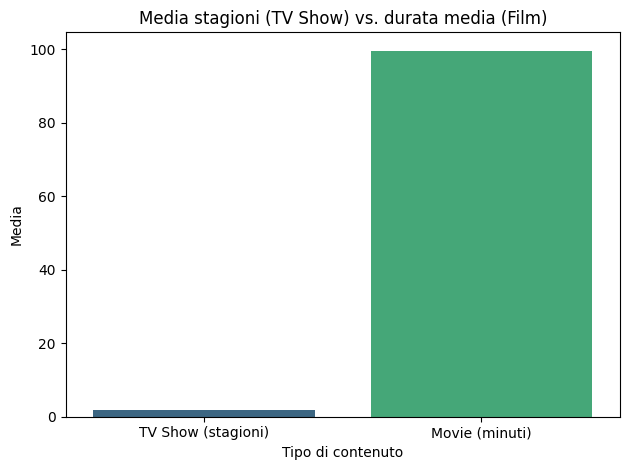

In [ ]:
mediaDati = {
    'TV Show (stagioni)': mediaSerieTv,
    'Movie (minuti)': mediaFilm
}

sns.barplot(x=list(mediaDati.keys()), y=list(mediaDati.values()), palette="viridis")
plt.title("Media stagioni (TV Show) vs. durata media (Film)")
plt.xlabel("Tipo di contenuto")
plt.ylabel("Media")
plt.tight_layout()
plt.show()

In [39]:
def classificaFilm(films):
    if films <= 60:
        return "Corto"
    elif films > 60 and films <= 90:
        return "Medio"
    elif films  > 90:
        return "Lungo"
    
films['Classifica_Durata'] = films['minutes'].apply(classificaFilm)

In [44]:
def classificaSerieTv(serie):
    if serie == 1:
        return "Corta"
    elif serie == 2:
        return "Media"
    else:
        return "Lunga"
series['Classifica_Durata'] = series['seasons'].apply(classificaSerieTv)



In [51]:
serieTv = series['Classifica_Durata'].value_counts()
serieTv

Classifica_Durata
Corta    1793
Lunga     458
Media     425
Name: count, dtype: int64

C:\Users\Vik10\AppData\Local\Temp\ipykernel_18080\3545287635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serieTv.index, y=serieTv.values, palette="viridis")


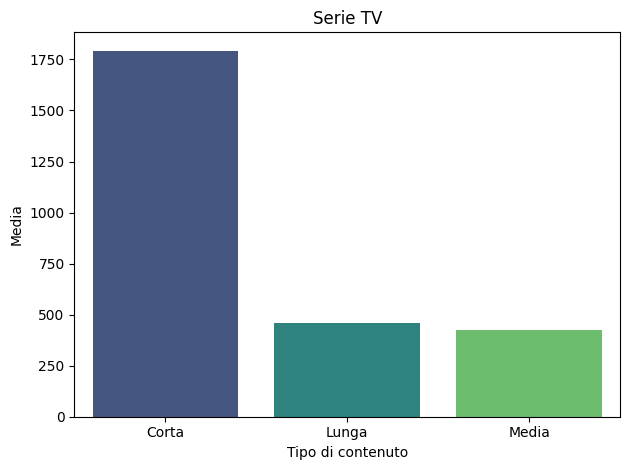

In [54]:
sns.barplot(x=serieTv.index, y=serieTv.values, palette="viridis")
plt.title("Serie TV")
plt.xlabel("Tipo di contenuto")
plt.ylabel("Media")
plt.tight_layout()
plt.show()

In [55]:
movie = films['Classifica_Durata'].value_counts()
movie

Classifica_Durata
Lungo    4138
Medio    1503
Corto     487
Name: count, dtype: int64

C:\Users\Vik10\AppData\Local\Temp\ipykernel_18080\2372080872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie.index, y=movie.values, palette="viridis")


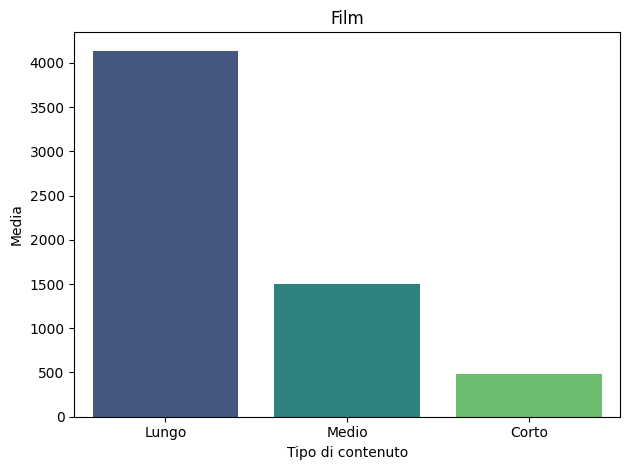

In [56]:
sns.barplot(x=movie.index, y=movie.values, palette="viridis")
plt.title("Film")
plt.xlabel("Tipo di contenuto")
plt.ylabel("Media")
plt.tight_layout()
plt.show()

Sulla base del dataframe scaricato in precedenza con i dati Netflix:

- Grafico a Torta con le percentuali di prodotti Film o Serie TV;

- Grafico con da distribuzione dei prodotti per paese;

- Grafico con andamento dell'aggiunta dei prodotti nel corso del tempo.



In [ ]:
conteggio_type = df['type'].value_counts()
